In [1]:
library(brms)
library(readxl)
#library(effects)
#library(sjPlot)

Loading required package: Rcpp

Loading 'brms' package (version 2.19.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar




## Preprocessing

We load the intertextuality data from the spreadsheet created in the previous notebook. Each row represents a (unique) pair of works. We are specifically interested in the `hit_ratio` column, or the number of intertexts that were measured for a given text pair (i.e. combinations of verse groups from a pair of works, with a distance below the optimal distance established on the annotated number of intertexts). This quantity has been normalized to the [0-1[ range, by dividing the absolute number of hits through the product of the length of the respective works in the pairs.

In [2]:
df <- read_excel("../figures/statistics.xlsx")
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NA,NA,0.0059659660
Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NA,NA,0.0012653194
Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0012403870
Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0008664010
Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0006851662
Roman van Cassant,Vande Hertogen ende Heeren van Brabant,29,302,6,Epiek,Epiek,Kruisvaart,Historiografie,NA,NA,0.0006850879
Ogier van Denemarken,Ongeïdentificeerd (4),530,139,49,Epiek,Epiek,Karel,Karel,NA,NA,0.0006651283
Van den neghen besten (kort),Vande Hertogen ende Heeren van Brabant,71,302,14,Epiek,Epiek,Didactiek,Historiografie,NA,NA,0.0006529242
Brabantsche yeesten (B7),Roman van Cassant,18188,29,330,Epiek,Epiek,Historiografie,Kruisvaart,NA,NA,0.0006256493


We limit this dataset to work pairs where both authors are known to keep our analysis maximally reliable:

In [3]:
df <- df[!is.na(df['author1']), ]
df <- df[!is.na(df['author2']), ]
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911e-04
Korte kroniek van Brabant (lange versie),Rijmkroniek van Woeringen,1989,9538,3207,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Heelu,1.690468e-04
Brabantsche yeesten (B1-5),Van den derden Eduwaert,6584,2017,2160,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Boendale,1.626515e-04
Brabantsche yeesten (B1-5),Rijmkroniek van Woeringen,6584,9538,9229,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Heelu,1.469628e-04
Rijmkroniek van Woeringen,Van den derden Eduwaert,9538,2017,2705,Epiek,Epiek,Historiografie,Historiografie,Jan van Heelu,Jan van Boendale,1.406061e-04
Brabantsche yeesten (B1-5),Korte kroniek van Brabant (lange versie),6584,1989,1796,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,1.371456e-04
Schepping,Sinte Jans ewangelium alsoe 't Augustijnken gheexponeert heeft,315,1050,44,Epiek,Epiek,Didactiek,Didactiek,Augustijnken,Augustijnken,1.330310e-04
Korte kroniek van Brabant (lange versie),Rijmbijbel,1989,35981,9283,Epiek,Epiek,Historiografie,Religie,Heraut Beyeren,Jacob van Maerlant,1.297121e-04
Korte kroniek van Brabant (lange versie),Van den derden Eduwaert,1989,2017,473,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Boendale,1.179018e-04


The two main predictors in our analysis will two two (binary) factors:
- `author`: whether or not the works in a pair share their author
- `genre`: : whether or not the works in a pair share their epic (sub)genre

We construct those factors here (with a utility functions that treats the `NA`s properly):

In [4]:
compareNA <- function(v1,v2) {
    same <- (v1 == v2) | (is.na(v1) & is.na(v2))
    same[is.na(same)] <- FALSE
    return(same)
}

df['author'] <- compareNA(df['author1'], df['author2'])
df['genre'] <- compareNA(df['subgenre1'], df['subgenre2'])
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,author,genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911e-04,FALSE,TRUE
Korte kroniek van Brabant (lange versie),Rijmkroniek van Woeringen,1989,9538,3207,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Heelu,1.690468e-04,FALSE,TRUE
Brabantsche yeesten (B1-5),Van den derden Eduwaert,6584,2017,2160,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Boendale,1.626515e-04,TRUE,TRUE
Brabantsche yeesten (B1-5),Rijmkroniek van Woeringen,6584,9538,9229,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Heelu,1.469628e-04,FALSE,TRUE
Rijmkroniek van Woeringen,Van den derden Eduwaert,9538,2017,2705,Epiek,Epiek,Historiografie,Historiografie,Jan van Heelu,Jan van Boendale,1.406061e-04,FALSE,TRUE
Brabantsche yeesten (B1-5),Korte kroniek van Brabant (lange versie),6584,1989,1796,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,1.371456e-04,FALSE,TRUE
Schepping,Sinte Jans ewangelium alsoe 't Augustijnken gheexponeert heeft,315,1050,44,Epiek,Epiek,Didactiek,Didactiek,Augustijnken,Augustijnken,1.330310e-04,TRUE,TRUE
Korte kroniek van Brabant (lange versie),Rijmbijbel,1989,35981,9283,Epiek,Epiek,Historiografie,Religie,Heraut Beyeren,Jacob van Maerlant,1.297121e-04,FALSE,FALSE
Korte kroniek van Brabant (lange versie),Van den derden Eduwaert,1989,2017,473,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Boendale,1.179018e-04,FALSE,TRUE


## Model

We are now ready to fit the actual model. After normalization, the dependent variable is a **proportion**, $ 0 \leq hit\_ratio \ < 1$:
- the proportion will often be zero, because no intertexts were found between two works
- the proportion can never be 1, because the works in a pair or never identical.

For modelling such a variable, the model *par excellence* seems to be a **zero-inflated beta regression**, that can be used to predict proportions that include zeroes. I took much inspiration from an excellent [blog post by Andrew Heiss](https://www.andrewheiss.com/blog/2021/11/08/beta-regression-guide/), who shows how to fit such a model in a Bayesian framework using the established R library [BRMS](https://cran.r-project.org/web/packages/brms/index.html), that offers a great interface to the underlying [Stan language](https://mc-stan.org/).

Below, we will fit and compare the following four models:
- `intercept-only` model (with no predictors)
- `genre-only` model (with only the `genre` predictor)
- `author-only` model (with only the `author` predictor)
- `covariate` model (with both the `author` and `genre` predictors)

Note:
1. that each model constructor contains *two* formulas: firstly, one for modelling $\phi$ (`phi`) (i.e. whether there are intertexts at all) and, secondly, another for modelling the actual `hit_ratio`. The first model is a plain **logistic regression**; the second is a **beta regression**.
2. that we always use identical formulae for each sub-objective of the model, i.e. the included predictors are first used to predict whether intertexts will occur at all, and next (that is, if any intertexts are present), how large the proportion is. If both predictors are included in a model, we do so in the additive mode (i.e. using a `+` in formulae syntax); we didn't consider interactions in order not to overcomplicate the matter.

https://pbs.twimg.com/media/Dz8eaKcX0AIU9vp?format=jpg&name=small

Let's fit the models:

In [5]:
intercept_only <- brm(
  bf(hit_ratio ~ 1,
     phi ~ 1,
     zi ~ 1),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [6]:
genre_only <- brm(
  bf(hit_ratio ~ genre,
     phi ~ genre,
     zi ~ genre),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [7]:
author_only <- brm(
  bf(hit_ratio ~ author,
     phi ~ author,
     zi ~ author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [8]:
covariate <- brm(
  bf(hit_ratio ~ genre + author,
     phi ~ genre + author,
     zi ~ genre + author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



## Model comparison

To compare the relative usefulness of these four models, we add the **leave-one-out criterion** for each model, which currently seems to be the preferred method for model comparison in Bayesian statistics:

In [9]:
intercept_only <- add_criterion(intercept_only, 'loo')
author_only    <- add_criterion(author_only, 'loo')
genre_only     <- add_criterion(genre_only, 'loo')
covariate      <- add_criterion(covariate, 'loo')

Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'author_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'covariate'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


(*Note that in two models, the software complains about the Pareto $k$-values being to high, but this is only for a very small number of observations (2 x 1), so can safely ignore this.*)

We can now compare the four models:

In [10]:
loo <- loo_compare(intercept_only, author_only, genre_only, covariate,
                   criterion="loo")
loo

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
covariate,0.000000,0.000000,6314.120,81.67097,13.238958,4.107073,-12628.24,163.3419
genre_only,-3.431077,4.439608,6310.689,81.18537,9.467521,3.257321,-12621.38,162.3707
author_only,-49.001573,23.883749,6265.119,87.73098,12.947182,5.342662,-12530.24,175.4620
intercept_only,-52.247895,22.438094,6261.872,86.32325,6.874159,3.426409,-12523.74,172.6465


As can be gleaned from the table above, the `covariate` model is clearly superior to the alternative model formulations. The `genre_only` model comes in second and, judging by the `elpd_diff` result, is more performant than the `author_only` model, which in turn only performs slightly better than the uninformative baseline model (`intercept_only`).

Finally, another method to compare the models is to consider their **Akaike weights**, which indicate how much statistical importance we should attach to differences in the Akaike informaton criterion values for each model (see [this paper](https://link.springer.com/article/10.3758/BF03206482); we previously applied this in a [paper](https://ceur-ws.org/Vol-3290/long_paper1591.pdf)). We can get those model weights as follows:

In [11]:
waic_wts <- model_weights(intercept_only, author_only, genre_only, covariate,
                          weights ="waic")
waic_wts

intercept_only    author_only     genre_only      covariate 
  1.439400e-23   6.552638e-22   2.501459e-02   9.749854e-01

Our previous observations are largely confirmed: the `covariate` model is assigned the lion's share of the model weights. The `genre_only` model is again (very slightly) better than the `author_only` model.

## Model inspection

We can now critically inspect the coefficients estimated for the predictors in the best model:

In [12]:
model_beta_zi <- covariate
model_beta_zi

 Family: zero_inflated_beta 
  Links: mu = logit; phi = log; zi = logit 
Formula: hit_ratio ~ genre + author 
         phi ~ genre + author
         zi ~ genre + author
   Data: df (Number of observations: 666) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        -11.38      0.04   -11.46   -11.29 1.00     3764     2993
phi_Intercept     11.42      0.07    11.28    11.57 1.00     3670     3294
zi_Intercept      -2.84      0.19    -3.24    -2.47 1.00     7363     2856
genreTRUE          0.91      0.12     0.68     1.16 1.00     3304     2917
authorTRUE         0.44      0.13     0.20     0.70 1.00     3507     3256
phi_genreTRUE     -1.36      0.18    -1.73    -1.03 1.00     3540     3123
phi_authorTRUE    -0.21      0.23    -0.68     0.21 1.00     3838     2960
zi_genreTRUE      -0.59      0.57    -1.77     0.46 1

In [13]:
#install.packages('tidyverse')        # ggplot, dplyr, %>%, and friends
#install.packages('broom')            # Convert model objects to data frames
#install.packages('broom.mixed')      # Convert brms model objects to data frames
#install.packages('extraDistr')       # Use extra distributions like dprop()
#install.packages('ggdist')           # Special geoms for posterior distributions
#install.packages('gghalves')         # Special half geoms
#install.packages('ggbeeswarm')       # Special distribution-shaped point jittering
#install.packages('ggrepel')          # Automatically position labels
#install.packages('patchwork')        # Combine ggplot objects
#install.packages('marginaleffects')  # Calculate marginal effects for frequentist models
#install.packages('emmeans')          # Calculate marginal effects in even fancier ways
#install.packages('modelsummary')     # Create side-by-side regression tables

In [14]:
library(tidyverse)        # ggplot, dplyr, %>%, and friends
library(brms)             # Bayesian modeling through Stan
library(tidybayes)        # Manipulate Stan objects in a tidy way
library(broom)            # Convert model objects to data frames
library(broom.mixed)      # Convert brms model objects to data frames
library(extraDistr)       # Use extra distributions like dprop()
library(ggdist)           # Special geoms for posterior distributions
library(gghalves)         # Special half geoms
library(ggbeeswarm)       # Special distribution-shaped point jittering
library(ggrepel)          # Automatically position labels
library(patchwork)        # Combine ggplot objects
library(marginaleffects)  # Calculate marginal effects for frequentist models
library(emmeans)          # Calculate marginal effects in even fancier ways
library(modelsummary)     # Create side-by-side regression tables

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tidybayes’


The following objects are masked from ‘package:brms’:

    dstudent_t, pstudent_t, qstudent_t, rstudent_t



Attaching package: ‘extraDistr’


The following object is masked from ‘package:purrr’:

    rdunif


The following objects are masked from ‘package:brms’:

    ddirichlet, dfr

In [15]:
set.seed(1234)  # Make everything reproducible

# Define the goodness-of-fit stats to include in modelsummary()
gof_stuff <- tribble(
  ~raw, ~clean, ~fmt,
  "nobs", "N", 0,
  "r.squared", "R²", 3
)

# Custom ggplot theme to make pretty plots
# Get the font at https://fonts.google.com/specimen/Barlow+Semi+Condensed
theme_clean <- function() {
  theme_minimal(base_family = "Barlow Semi Condensed") +
    theme(panel.grid.minor = element_blank(),
          plot.title = element_text(family = "BarlowSemiCondensed-Bold"),
          axis.title = element_text(family = "BarlowSemiCondensed-Medium"),
          strip.text = element_text(family = "BarlowSemiCondensed-Bold",
                                    size = rel(1), hjust = 0),
          strip.background = element_rect(fill = "grey80", color = NA))
}

# Make labels use Barlow by default
update_geom_defaults("label_repel", list(family = "Barlow Semi Condensed"))

In [16]:
pred_beta_zi <- model_beta_zi %>% 
  epred_draws(newdata = expand_grid(genre = c(FALSE, TRUE), author = c(FALSE, TRUE)),
              dpar = "zi")

In [17]:
# Look at the average zero-inflation probability across quota
pred_beta_zi %>% 
  group_by(genre) %>% 
  summarize(avg_zi = mean(zi)) %>% 
  mutate(diff = avg_zi - lag(avg_zi))

genre,avg_zi,diff
<lgl>,<dbl>,<dbl>
FALSE,0.03847282,NA
TRUE,0.02410199,-0.01437083


In [18]:
pred_beta_zi %>% 
  group_by(author) %>% 
  summarize(avg_zi = mean(zi)) %>% 
  mutate(diff = avg_zi - lag(avg_zi))

author,avg_zi,diff
<lgl>,<dbl>,<dbl>
FALSE,0.04576495,NA
TRUE,0.01680986,-0.02895509


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.g

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call.graphics(C_tex

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in 

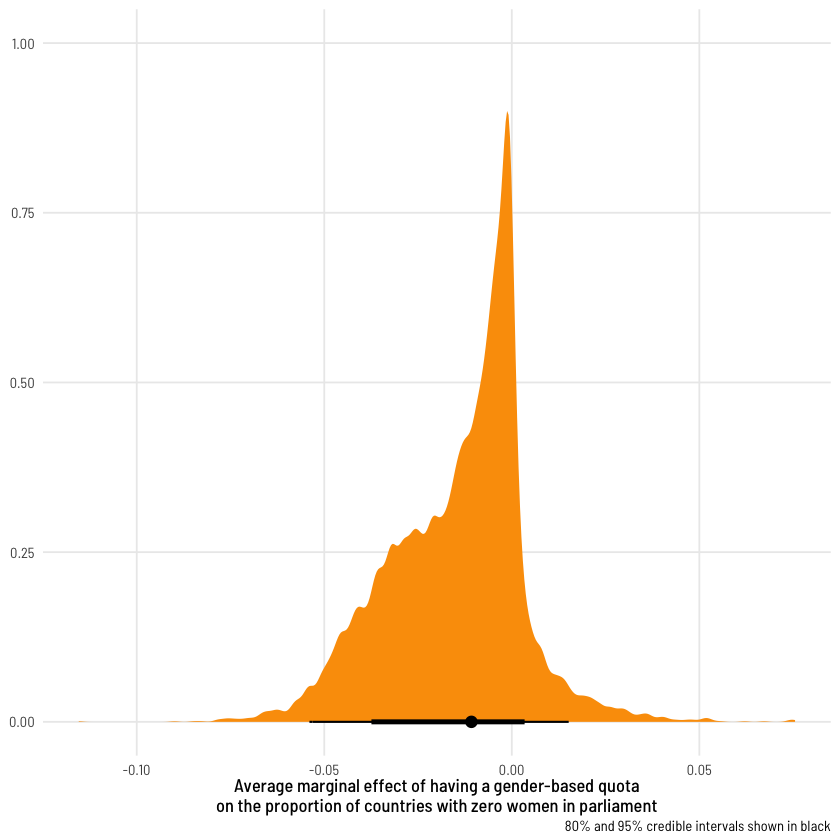

In [47]:
mfx_quota_zi <- pred_beta_zi %>% 
  ungroup() %>% 
  select(-.row, -.epred, -.chain, -.iteration) %>% 
  pivot_wider(names_from = "genre", values_from = "zi") %>% 
  mutate(zi_quota_effect = `TRUE` - `FALSE`)

ggplot(mfx_quota_zi, aes(x = zi_quota_effect)) +
  stat_halfeye(.width = c(0.8, 0.95), point_interval = "median_hdi",
               fill = "#fb9e07") +
  labs(x = "Average marginal effect of having a gender-based quota\non the proportion of countries with zero women in parliament", 
       y = NULL, caption = "80% and 95% credible intervals shown in black") +
  theme_clean()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Medium' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_t

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call.graphics(C_text, as.gra

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

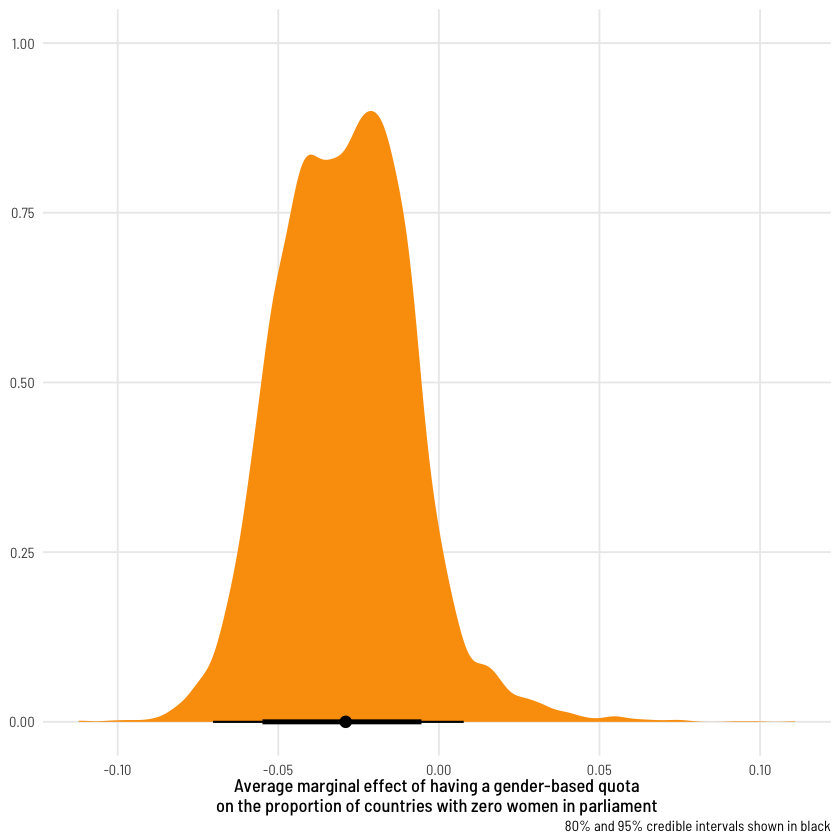

In [48]:
mfx_quota_zi <- pred_beta_zi %>% 
  ungroup() %>% 
  select(-.row, -.epred, -.chain, -.iteration) %>% 
  pivot_wider(names_from = "author", values_from = "zi") %>% 
  mutate(zi_quota_effect = `TRUE` - `FALSE`)

ggplot(mfx_quota_zi, aes(x = zi_quota_effect)) +
  stat_halfeye(.width = c(0.8, 0.95), point_interval = "median_hdi",
               fill = "#fb9e07") +
  labs(x = "Average marginal effect of having a gender-based quota\non the proportion of countries with zero women in parliament", 
       y = NULL, caption = "80% and 95% credible intervals shown in black") +
  theme_clean()

In [86]:
beta_zi_pred <- model_beta_zi %>% 
  predicted_draws(newdata = tibble(genre = c(FALSE, TRUE), author = c(FALSE, TRUE))) %>% 
  mutate(is_zero = .prediction == 0,
         .prediction = ifelse(is_zero, .prediction - 0.00005, .prediction))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_tex

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

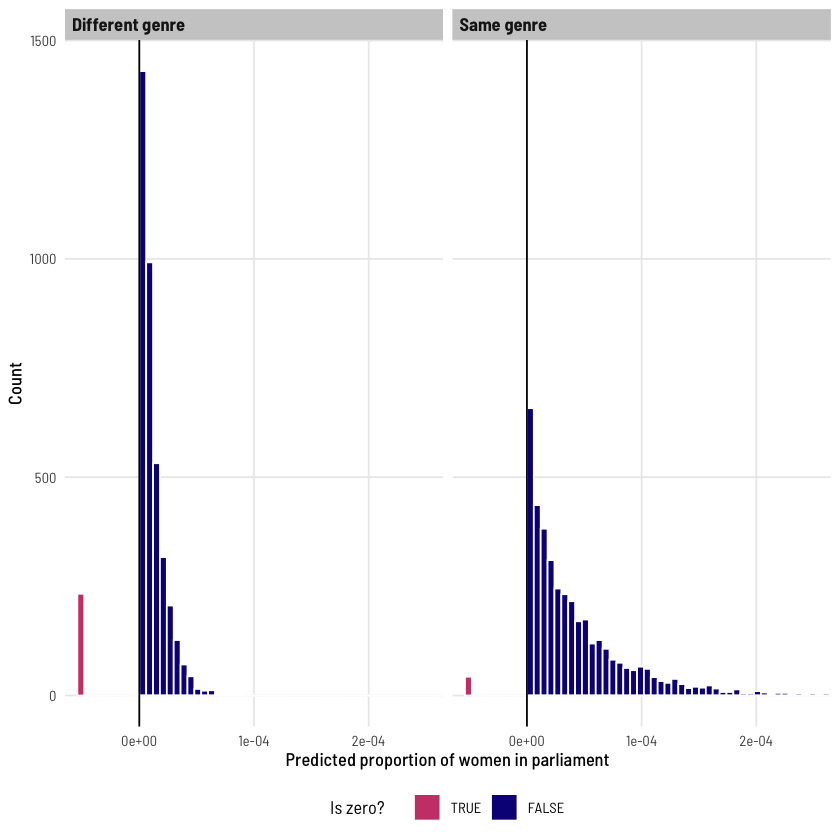

In [87]:
ggplot(beta_zi_pred, aes(x = .prediction)) +
  geom_histogram(aes(fill = is_zero), binwidth = 0.000006, 
                 boundary = 0, color = "white") +
  geom_vline(xintercept = 0) +
  scale_fill_viridis_d(option = "plasma", end = 0.5,
                       guide = guide_legend(reverse = TRUE)) +
  labs(x = "Predicted proportion of women in parliament", 
       y = "Count", fill = "Is zero?") +
  facet_wrap(vars(genre), ncol = 2,
             labeller = labeller(genre = c(`TRUE` = "Same genre", 
                                           `FALSE` = "Different genre"))) +
  coord_cartesian(xlim = c(- 0.00005 , 0.00025)) +
  theme_clean() +
  theme(legend.position = "bottom") 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'BarlowSemiCondensed-Bold' not found in PostScript font database”
Warning message in grid.Call(C_tex

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Barlow Semi Condensed' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphi

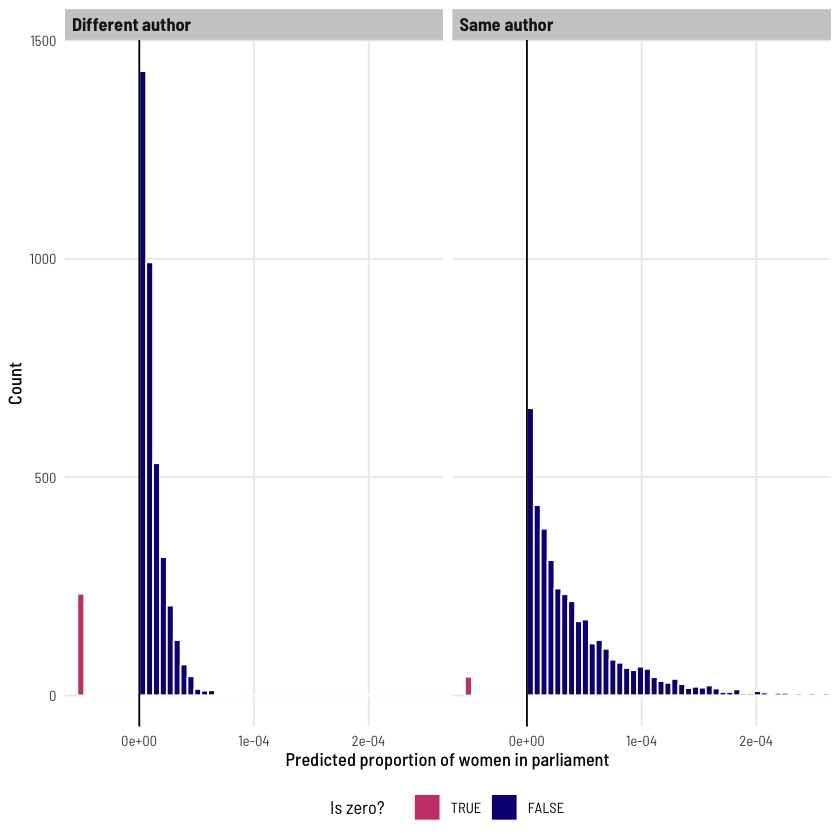

In [88]:
ggplot(beta_zi_pred, aes(x = .prediction)) +
  geom_histogram(aes(fill = is_zero), binwidth = 0.000006, 
                 boundary = 0, color = "white") +
  geom_vline(xintercept = 0) +
  scale_fill_viridis_d(option = "plasma", end = 0.5,
                       guide = guide_legend(reverse = TRUE)) +
  labs(x = "Predicted proportion of women in parliament", 
       y = "Count", fill = "Is zero?") +
  facet_wrap(vars(author), ncol = 2,
             labeller = labeller(author = c(`TRUE` = "Same author", 
                                           `FALSE` = "Different author"))) +
  coord_cartesian(xlim = c(- 0.00005 , 0.00025)) +
  theme_clean() +
  theme(legend.position = "bottom") 

In [24]:
plot_model(covariate, type="est", transform=NULL, show.values=T)#, terms=c("genreTRUE", "authorTRUE", "phi_genreTRUE", "phi_authorTRUE"))

ERROR: Error in plot_model(covariate, type = "est", transform = NULL, show.values = T): could not find function "plot_model"
